In [219]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [220]:
print(x_train.max())
print(x_train.min())

X_train = x_train.astype("float32")/255
X_test = x_test.astype("float32")/255
X_test.min(), X_test.max()

255
0


(0.0, 1.0)

In [221]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

def MLP_model(nodes = None, names = None, activations =[]):
    model = Sequential(name ="MLP_model")
    model.add(Flatten(input_shape=(28,28), name = "input_layer"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name = name, activation = activation))
    
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adamax", metrics = ["accuracy"])

    return model

model_1 = MLP_model(nodes = [10], names = ["Output_layer"], activations=["softmax"])
model_1.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [222]:
#model_1.fit(X_train, y_train, validation_split=1/6, epochs=9, verbose=1)

In [223]:
import pandas as pd
#metrics = pd.DataFrame(model_1.history.history)
#metrics.index = range(len(metrics))
#metrics.tail()

In [224]:
#def plot_metrics(df_history, style = "-o"):
    #_, axes = plt.subplots(1,2,figsize = (12,4))
    #columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    #for ax, col in zip(axes, columns):
        #df_history.plot(y=col, xlabel="Epochs", ylabel = col[0], ax = ax, style = style)
        
#plot_metrics(metrics)  

In [225]:
model_2 = MLP_model(nodes = [512,512,10], activations=["relu", "relu", "softmax"], names = ["Hidden1", "Hidden2", "Output"])

model_2.summary()
model_2.fit(X_train, y_train, validation_split=1/6, epochs=50, verbose=1)

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden1 (Dense)             (None, 512)               401920    
                                                                 
 Hidden2 (Dense)             (None, 512)               262656    
                                                                 
 Output (Dense)              (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4855 - accuracy: 0.8274 - val_loss: 0.4011 - val_accuracy: 0.8554
Epoch 2/50
1563/1563 [================

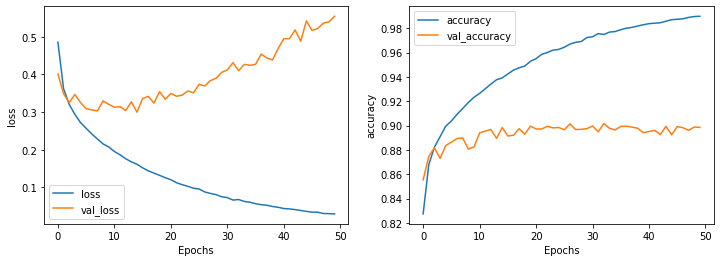

In [226]:
metrics = pd.DataFrame(model_2.history.history)
metrics.index = range(len(metrics))
plot_metrics(metrics, style="-")

In [227]:
import pandas as pd
metrics = pd.DataFrame(model_2.history.history)
metrics.index = range(len(metrics))
metrics.tail(30)

,loss,accuracy,val_loss,val_accuracy
20,0.120554,0.95502,0.349466,0.8972
21,0.112589,0.95858,0.342053,0.8972
22,0.107445,0.96008,0.345211,0.8994
23,0.103036,0.96202,0.356095,0.8981
24,0.098143,0.96260,0.351133,0.8984
25,0.095874,0.96440,0.373758,0.8966
26,0.088155,0.96698,0.369419,0.9014
27,0.084101,0.96840,0.383516,0.8967
28,0.081098,0.96910,0.389854,0.8969
29,0.075396,0.97236,0.405440,0.8975
